## Exercício - Titanic
disponível em https://www.kaggle.com/c/titanic/overview

#### Descrição
O naufrágio do RMS Titanic é um dos naufrágios mais famosos da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Essa tragédia chocou a comunidade internacional e levou a melhores regulamentações de segurança para os navios.

Uma das razões pelas quais o naufrágio levou a tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta.

Nesse desafio, a atividade é que você conclua a análise de que tipo de pessoa provavelmente sobreviverá. Em particular, solicitamos você deve aplicar classificadores de árvores de decisão para esta atividade.


### Descrição do dataset
Os dados foram divididos em dois grupos:

conjunto de treinamento (train.csv)
conjunto de teste (test.csv)
O conjunto de treinamento deve ser usado para criar seus modelos de aprendizado de máquina. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como "verdade do solo") para cada passageiro. Seu modelo será baseado em "atributos", como sexo e classe dos passageiros. Você também pode usar a engenharia de atributos para criar novos atributos.

Parte do conjunto de treino deve ser usado para ver o desempenho do seu modelo em dados não vistos. 

Para o conjunto de testes, não é fornecido o rótulo de classe para cada passageiro. É seu trabalho prever esses resultados. Para cada passageiro no conjunto de testes, use o modelo que você treinou para prever se eles sobreviveram ou não ao naufrágio do Titanic. O resultado deve ser submetido na plataforma Kaggle (opção **submit predictions**) a fim de calcular a acurácia. 

Também incluímos gender_submission.csv, um conjunto de previsões que supõem que todas e apenas passageiras sobrevivem, como um exemplo da aparência de um arquivo de envio.

### Dicionário de Dados

**Variable -	Definition	- Key**

survival - Survival	- 0 = No, 1 = Yes

pclass -	Ticket class -	1 = 1st, 2 = 2nd, 3 = 3rd

sex -	Sex	

Age	- Age in years	

sibsp -	# of siblings / spouses aboard the Titanic	

parch- # of parents / children aboard the Titanic	

ticket - Ticket number	

fare - Passenger fare	

cabin- Cabin number	

embarked- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Importando bibliotecas

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets
import graphviz

### Importando datasets de traino e teste

In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Separando os dados entre features e targets

In [4]:
# Selecionando apenas as colunas de interesse
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X_train = data_train[columns]
y_train = data_train['Survived']
X_test = data_test[columns]
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


### Visualisando o valor medio de fare e discretizando a coluna

In [5]:
print('Valor médio =', X_train['Fare'].mean())
X_train.loc[X_train['Fare'] < 32.204208, 'Fare'] = 0
X_train.loc[X_train['Fare'] >= 32.204208, 'Fare'] = 1
X_test.loc[X_test['Fare'] < 32.204208, 'Fare'] = 0
X_test.loc[X_test['Fare'] >= 32.204208, 'Fare'] = 1
print('Valores unicos: ', X_train['Fare'].unique())

Valor médio = 32.2042079685746
Valores unicos:  [0. 1.]


### Separando dados categóricos para colunas númericas

In [6]:
X_train = pd.get_dummies(X_train)
X_train.fillna(0, inplace = True)
X_test = pd.get_dummies(X_test)
X_test.fillna(0, inplace = True)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,0.0,0,1
1,1,38.0,1,0,1.0,1,0
2,3,26.0,0,0,0.0,1,0
3,1,35.0,1,0,1.0,1,0
4,3,35.0,0,0,0.0,0,1


### Criando e treinando o modelo

In [7]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train) # Training model
predictions = model.predict(X_test) # Test model

### Criando arquivo de saída para verificar a accuracy

In [8]:
df = pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': predictions})
df.to_csv('y_predictions.csv', sep=',', encoding='utf-8', index=False)
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Criando arquivo dot para vizualizar a arvore de decisão

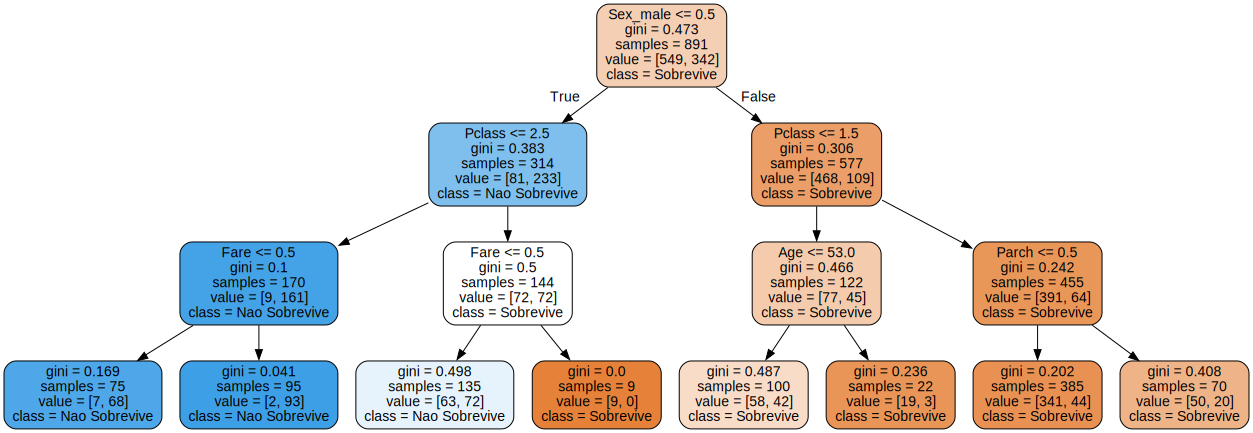

In [9]:
tree.export_graphviz(model, out_file='titanic.dot',
                   feature_names=['Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male'], 
                   class_names=['Sobrevive', 'Nao Sobrevive'],
                   label='all',
                   rounded=True,
                   filled=True)
graph = graphviz.Source(open("titanic.dot", "r").read())
graph